In [74]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'books.db',
 'chromedriver.exe',
 'jupyter_lab.bat',
 'kaggle',
 'Practice Code',
 'python_9-1.xlsx',
 'scikit-learn',
 'Untitled.ipynb',
 '~$python_9-1.xlsx',
 '수업내용',
 '연습',
 '웹크롤링(이마트).ipynb',
 '인천지방해양안전심판원',
 '전처리',
 '전처리및EDA학습자료']

# 시트별 엑셀데이터 병합

In [3]:
pd.read_excel('python_9-1.xlsx', sheet_name='1월').head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,담당,팀장,사장
1,NaN,NaN,NaN,NaN,NaN,NaN,(인),(인),(인)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1월 매출대장,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
6,NaN,2018.1.1,지점4,제품B,14,C-137,서울특별시 종로구 이화동,주문완료,인터넷뱅킹
7,NaN,2018.1.2,지점4,제품D,4,C-48,서울특별시 성북구 길음동,배송완료,신용카드
8,NaN,2018.1.2,지점2,제품E,2,C-271,서울특별시 금천구 시흥동,주문완료,신용카드
9,NaN,2018.1.3,지점2,제품C,17,C-136,서울특별시 종로구 익선동,배송중,휴대폰결제


In [4]:
df = pd.read_excel('python_9-1.xlsx', sheet_name='1월')
colum_name = df.iloc[5, 1:].tolist()
merged_df = pd.DataFrame([], columns=colum_name)
merged_df

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단


In [5]:
for month in range(1,13):
    df = pd.read_excel('python_9-1.xlsx', sheet_name=str(month)+'월')
    df = pd.DataFrame(df.iloc[6:,1:].values, columns=colum_name)
    merged_df = pd.concat([merged_df, df], ignore_index=True)

In [6]:
merged_df

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.1.1,지점4,제품B,14,C-137,서울특별시 종로구 이화동,주문완료,인터넷뱅킹
1,2018.1.2,지점4,제품D,4,C-48,서울특별시 성북구 길음동,배송완료,신용카드
2,2018.1.2,지점2,제품E,2,C-271,서울특별시 금천구 시흥동,주문완료,신용카드
3,2018.1.3,지점2,제품C,17,C-136,서울특별시 종로구 익선동,배송중,휴대폰결제
4,2018.1.3,지점4,제품B,6,C-364,서울특별시 도봉구 방학동,주문완료,인터넷뱅킹
...,...,...,...,...,...,...,...,...
343,2018-12-24,지점3,제품E,3,C-442,서울특별시 강동구 명일동,배송중,인터넷뱅킹
344,2018-12-26,지점2,제품B,2,C-430,서울특별시 동작구 신대방동,주문완료,인터넷뱅킹
345,2018-12-28,지점2,제품D,7,C-412,서울특별시 종로구 봉익동,주문완료,신용카드
346,2018-12-29,지점2,제품D,1,C-320,서울특별시 마포구 도화동,주문완료,신용카드


# 전처리
* '가격'컬럼 추가 및 병합
* '일자' 컬럼 datetime 형태 변환을 위한 전처리

In [7]:
merged_df['일자']

0        2018.1.1
1        2018.1.2
2        2018.1.2
3        2018.1.3
4        2018.1.3
          ...    
343    2018-12-24
344    2018-12-26
345    2018-12-28
346    2018-12-29
347    2018-12-30
Name: 일자, Length: 348, dtype: object

In [8]:
merged_df['일자'].str.contains('-')

0      False
1      False
2      False
3      False
4      False
       ...  
343     True
344     True
345     True
346     True
347     True
Name: 일자, Length: 348, dtype: bool

In [9]:
merged_df['일자'] = merged_df['일자'].str.replace('.', '-')
merged_df

<ipython-input-9-c4008084ff6c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  merged_df['일자'] = merged_df['일자'].str.replace('.', '-')


,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018-1-1,지점4,제품B,14,C-137,서울특별시 종로구 이화동,주문완료,인터넷뱅킹
1,2018-1-2,지점4,제품D,4,C-48,서울특별시 성북구 길음동,배송완료,신용카드
2,2018-1-2,지점2,제품E,2,C-271,서울특별시 금천구 시흥동,주문완료,신용카드
3,2018-1-3,지점2,제품C,17,C-136,서울특별시 종로구 익선동,배송중,휴대폰결제
4,2018-1-3,지점4,제품B,6,C-364,서울특별시 도봉구 방학동,주문완료,인터넷뱅킹
...,...,...,...,...,...,...,...,...
343,2018-12-24,지점3,제품E,3,C-442,서울특별시 강동구 명일동,배송중,인터넷뱅킹
344,2018-12-26,지점2,제품B,2,C-430,서울특별시 동작구 신대방동,주문완료,인터넷뱅킹
345,2018-12-28,지점2,제품D,7,C-412,서울특별시 종로구 봉익동,주문완료,신용카드
346,2018-12-29,지점2,제품D,1,C-320,서울특별시 마포구 도화동,주문완료,신용카드


In [12]:
merged_df['일자']

0        2018-1-1
1        2018-1-2
2        2018-1-2
3        2018-1-3
4        2018-1-3
          ...    
343    2018-12-24
344    2018-12-26
345    2018-12-28
346    2018-12-29
347    2018-12-30
Name: 일자, Length: 348, dtype: object

In [23]:
price = pd.DataFrame({'제품명':['제품A', '제품B', '제품C', '제품D', '제품E', '제품F'],
             '가격':[20000, 5000, 10000, 8000, 30000, 15000]})
price

,제품명,가격
0,제품A,20000
1,제품B,5000
2,제품C,10000
3,제품D,8000
4,제품E,30000
5,제품F,15000


# merge 병합

In [30]:
merged_df = pd.merge(merged_df, price, left_on='품명', right_on='제품명', how='left')
merged_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,제품명,가격
0,2018-1-1,지점4,제품B,14,C-137,서울특별시 종로구 이화동,주문완료,인터넷뱅킹,제품B,5000
1,2018-1-2,지점4,제품D,4,C-48,서울특별시 성북구 길음동,배송완료,신용카드,제품D,8000
2,2018-1-2,지점2,제품E,2,C-271,서울특별시 금천구 시흥동,주문완료,신용카드,제품E,30000
3,2018-1-3,지점2,제품C,17,C-136,서울특별시 종로구 익선동,배송중,휴대폰결제,제품C,10000
4,2018-1-3,지점4,제품B,6,C-364,서울특별시 도봉구 방학동,주문완료,인터넷뱅킹,제품B,5000


In [33]:
merged_df.drop('제품명', axis=1, inplace=True)

In [34]:
merged_df

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격
0,2018-1-1,지점4,제품B,14,C-137,서울특별시 종로구 이화동,주문완료,인터넷뱅킹,5000
1,2018-1-2,지점4,제품D,4,C-48,서울특별시 성북구 길음동,배송완료,신용카드,8000
2,2018-1-2,지점2,제품E,2,C-271,서울특별시 금천구 시흥동,주문완료,신용카드,30000
3,2018-1-3,지점2,제품C,17,C-136,서울특별시 종로구 익선동,배송중,휴대폰결제,10000
4,2018-1-3,지점4,제품B,6,C-364,서울특별시 도봉구 방학동,주문완료,인터넷뱅킹,5000
...,...,...,...,...,...,...,...,...,...
343,2018-12-24,지점3,제품E,3,C-442,서울특별시 강동구 명일동,배송중,인터넷뱅킹,30000
344,2018-12-26,지점2,제품B,2,C-430,서울특별시 동작구 신대방동,주문완료,인터넷뱅킹,5000
345,2018-12-28,지점2,제품D,7,C-412,서울특별시 종로구 봉익동,주문완료,신용카드,8000
346,2018-12-29,지점2,제품D,1,C-320,서울특별시 마포구 도화동,주문완료,신용카드,8000


# datetime 변환

In [37]:
merged_df['일자'] = pd.to_datetime(merged_df['일자'])

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      348 non-null    datetime64[ns]
 1   지점      348 non-null    object        
 2   품명      348 non-null    object        
 3   수량      348 non-null    object        
 4   주문인 ID  348 non-null    object        
 5   수령 주소   348 non-null    object        
 6   주문 상태   348 non-null    object        
 7   결제 수단   348 non-null    object        
 8   가격      348 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 35.3+ KB


In [42]:
merged_df['일자'].dt.week            ##주차 추출

<ipython-input-42-a9b2f91d4a0c>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  merged_df['일자'].dt.week


0       1
1       1
2       1
3       1
4       1
       ..
343    52
344    52
345    52
346    52
347    52
Name: 일자, Length: 348, dtype: int64

In [45]:
merged_df['일자'].dt.day_name()        ##요일 추출

0         Monday
1        Tuesday
2        Tuesday
3      Wednesday
4      Wednesday
         ...    
343       Monday
344    Wednesday
345       Friday
346     Saturday
347       Sunday
Name: 일자, Length: 348, dtype: object

# EDA 시각화

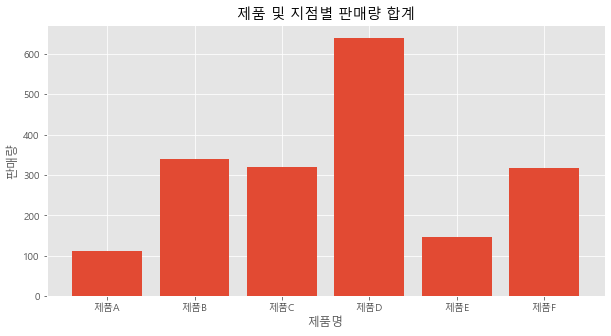

In [73]:
plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,5))
plt.title('제품 및 지점별 판매량 합계')
plt.bar(merged_df.groupby(merged_df['품명'], axis=0)['수량'].sum().index,
       merged_df.groupby(merged_df['품명'], axis=0)['수량'].sum())
plt.xlabel('제품명')
plt.ylabel('판매량')
plt.show()

In [58]:
merged_df.groupby(by=(merged_df['품명']), axis=0)['수량'].sum().

품명
제품A    111
제품B    340
제품C    319
제품D    640
제품E    147
제품F    318
Name: 수량, dtype: int64

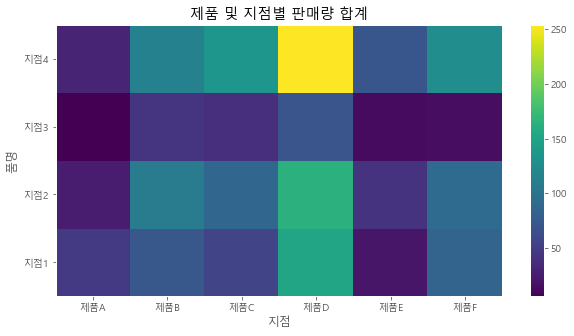

In [93]:
plt.figure(figsize=(10,5))
plt.title('제품 및 지점별 판매량 합계')
pcolor_df = merged_df.groupby(['지점', '품명'])['수량'].sum()
pcolor_df = pcolor_df.reset_index()
pivot_df = pcolor_df.pivot('지점', '품명', '수량')
plt.xticks(np.arange(0.5, len(pivot_df.columns)), pivot_df.columns)
plt.yticks(np.arange(0.5, len(pivot_df.index)), pivot_df.index)
plt.xlabel('지점')
plt.ylabel('품명')
plt.pcolor(pivot_df)
plt.colorbar()
plt.show()

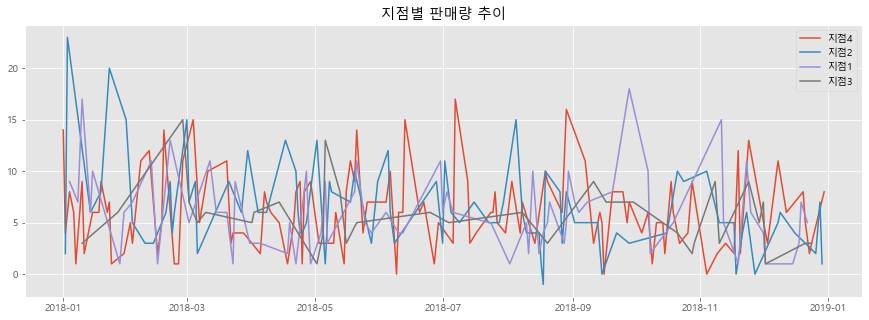

In [97]:
plt.figure(figsize=(15,5))
plt.title('지점별 판매량 추이')
for branch in merged_df['지점'].unique():
    branch_df = merged_df[merged_df['지점'] == branch]
    graph_series = branch_df.groupby('일자')['수량'].sum()
    x = graph_series.index
    y = graph_series
    plt.plot(x, y, label=branch)

plt.legend(loc='upper right')
plt.show()

# 우수고객 판별
* 주문횟수/금액 동시 만족 우수고객

In [106]:
merged_df

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문금액
0,2018-01-01,지점4,제품B,14,C-137,서울특별시 종로구 이화동,주문완료,인터넷뱅킹,5000,70000
1,2018-01-02,지점4,제품D,4,C-48,서울특별시 성북구 길음동,배송완료,신용카드,8000,32000
2,2018-01-02,지점2,제품E,2,C-271,서울특별시 금천구 시흥동,주문완료,신용카드,30000,60000
3,2018-01-03,지점2,제품C,17,C-136,서울특별시 종로구 익선동,배송중,휴대폰결제,10000,170000
4,2018-01-03,지점4,제품B,6,C-364,서울특별시 도봉구 방학동,주문완료,인터넷뱅킹,5000,30000
...,...,...,...,...,...,...,...,...,...,...
343,2018-12-24,지점3,제품E,3,C-442,서울특별시 강동구 명일동,배송중,인터넷뱅킹,30000,90000
344,2018-12-26,지점2,제품B,2,C-430,서울특별시 동작구 신대방동,주문완료,인터넷뱅킹,5000,10000
345,2018-12-28,지점2,제품D,7,C-412,서울특별시 종로구 봉익동,주문완료,신용카드,8000,56000
346,2018-12-29,지점2,제품D,1,C-320,서울특별시 마포구 도화동,주문완료,신용카드,8000,8000


In [105]:
merged_df['주문금액'] = merged_df['수량']*merged_df['가격']

* 주문횟수/금액 동시 만족 우수고객 도출

In [126]:
top_100_freq = merged_df.groupby('주문인 ID')['주문금액'].count().sort_values(ascending=False).index[:100]
top_100_money = merged_df.groupby('주문인 ID')['주문금액'].sum().sort_values(ascending=False).index[:100]
top_100_customer = pd.Series(top_100_freq & top_100_money)

<ipython-input-126-b66b41fd4303>:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  top_100_customer = pd.Series(top_100_freq & top_100_money)


In [180]:
top_100_customer.values

array(['C-77', 'C-229', 'C-281', 'C-316', 'C-321', 'C-220', 'C-483',
       'C-337', 'C-138', 'C-249', 'C-320', 'C-442', 'C-61', 'C-427',
       'C-194', 'C-280', 'C-106', 'C-94', 'C-380', 'C-20', 'C-323',
       'C-47', 'C-460', 'C-241', 'C-46', 'C-260', 'C-43', 'C-268',
       'C-284', 'C-263', 'C-436', 'C-252', 'C-459', 'C-446', 'C-420',
       'C-3', 'C-449', 'C-453', 'C-454', 'C-144', 'C-338', 'C-13',
       'C-136', 'C-398', 'C-345', 'C-187', 'C-146', 'C-65', 'C-343',
       'C-431', 'C-185', 'C-56', 'C-176', 'C-170', 'C-385', 'C-383',
       'C-381', 'C-416', 'C-403', 'C-0', 'C-5'], dtype=object)

* 최종 우수고객 DF화

In [184]:
top_100_customer = pd.DataFrame({'주문인 ID':['C-77', 'C-229', 'C-281', 'C-316', 'C-321', 'C-220', 'C-483',
       'C-337', 'C-138', 'C-249', 'C-320', 'C-442', 'C-61', 'C-427',
       'C-194', 'C-280', 'C-106', 'C-94', 'C-380', 'C-20', 'C-323',
       'C-47', 'C-460', 'C-241', 'C-46', 'C-260', 'C-43', 'C-268',
       'C-284', 'C-263', 'C-436', 'C-252', 'C-459', 'C-446', 'C-420',
       'C-3', 'C-449', 'C-453', 'C-454', 'C-144', 'C-338', 'C-13',
       'C-136', 'C-398', 'C-345', 'C-187', 'C-146', 'C-65', 'C-343',
       'C-431', 'C-185', 'C-56', 'C-176', 'C-170', 'C-385', 'C-383',
       'C-381', 'C-416', 'C-403', 'C-0', 'C-5']})
top_100_customer

,주문인 ID
0,C-77
1,C-229
2,C-281
3,C-316
4,C-321
...,...
56,C-381
57,C-416
58,C-403
59,C-0


In [171]:
merged_df

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문금액
0,2018-01-01,지점4,제품B,14,C-137,서울특별시 종로구 이화동,주문완료,인터넷뱅킹,5000,70000
1,2018-01-02,지점4,제품D,4,C-48,서울특별시 성북구 길음동,배송완료,신용카드,8000,32000
2,2018-01-02,지점2,제품E,2,C-271,서울특별시 금천구 시흥동,주문완료,신용카드,30000,60000
3,2018-01-03,지점2,제품C,17,C-136,서울특별시 종로구 익선동,배송중,휴대폰결제,10000,170000
4,2018-01-03,지점4,제품B,6,C-364,서울특별시 도봉구 방학동,주문완료,인터넷뱅킹,5000,30000
...,...,...,...,...,...,...,...,...,...,...
343,2018-12-24,지점3,제품E,3,C-442,서울특별시 강동구 명일동,배송중,인터넷뱅킹,30000,90000
344,2018-12-26,지점2,제품B,2,C-430,서울특별시 동작구 신대방동,주문완료,인터넷뱅킹,5000,10000
345,2018-12-28,지점2,제품D,7,C-412,서울특별시 종로구 봉익동,주문완료,신용카드,8000,56000
346,2018-12-29,지점2,제품D,1,C-320,서울특별시 마포구 도화동,주문완료,신용카드,8000,8000


In [178]:
merged_df[merged_df['주문인 ID'].str.contains('C-77|C-229')]            # 이 방법으로 일일이 대입 불가

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문금액
32,2018-01-28,지점1,제품D,1,C-77,서울특별시 용산구 효창동,주문완료,인터넷뱅킹,8000,8000
116,2018-04-25,지점4,제품B,1,C-229,서울특별시 중구 주자동,배송완료,인터넷뱅킹,5000,5000
145,2018-05-20,지점1,제품F,8,C-229,서울특별시 강서구 오쇠동,주문완료,신용카드,15000,120000
166,2018-06-12,지점1,제품D,4,C-77,서울특별시 종로구 신문로2가,배송중,무통장입금,8000,32000
207,2018-08-05,지점2,제품F,8,C-77,서울특별시 영등포구 신길동,배송중,신용카드,15000,120000
241,2018-08-30,지점1,제품F,7,C-229,서울특별시 성동구 성수동2가,배송중,인터넷뱅킹,15000,105000
312,2018-11-23,지점1,제품A,8,C-229,서울특별시 중구 태평로1가,주문완료,인터넷뱅킹,20000,160000
337,2018-12-20,지점4,제품D,8,C-77,서울특별시 송파구 가락동,배송완료,인터넷뱅킹,8000,64000
339,2018-12-21,지점3,제품D,3,C-77,서울특별시 은평구 구산동,배송중,인터넷뱅킹,8000,24000


In [186]:
top_100_customer = pd.merge(merged_df, top_100_customer, on='주문인 ID', how='right')
top_100_customer

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문금액
0,2018-01-28,지점1,제품D,1,C-77,서울특별시 용산구 효창동,주문완료,인터넷뱅킹,8000,8000
1,2018-06-12,지점1,제품D,4,C-77,서울특별시 종로구 신문로2가,배송중,무통장입금,8000,32000
2,2018-08-05,지점2,제품F,8,C-77,서울특별시 영등포구 신길동,배송중,신용카드,15000,120000
3,2018-12-20,지점4,제품D,8,C-77,서울특별시 송파구 가락동,배송완료,인터넷뱅킹,8000,64000
4,2018-12-21,지점3,제품D,3,C-77,서울특별시 은평구 구산동,배송중,인터넷뱅킹,8000,24000
...,...,...,...,...,...,...,...,...,...,...
135,2018-07-06,지점1,제품E,6,C-381,서울특별시 강동구 강일동,배송중,인터넷뱅킹,30000,180000
136,2018-09-28,지점4,제품F,7,C-416,서울특별시 중구 장교동,배송중,인터넷뱅킹,15000,105000
137,2018-01-19,지점2,제품E,8,C-403,서울특별시 마포구 연남동,배송완료,인터넷뱅킹,30000,240000
138,2018-01-31,지점2,제품F,8,C-0,서울특별시 송파구 석촌동,배송중,신용카드,15000,120000
